classify the radio signalsfrom outer spaceinto one of four classes

In [ ]:
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.12.0


In [ ]:
train_images = pd.read_csv('/content/SETI Dataset/train/images.csv', header=None)
# There is an error in the training label csv file existing in seti2ddata available on Kaggle. So, uploaded the correct training label
train_labels = pd.read_csv('/content/SETI Dataset/train/labels.csv', header=None)

val_images = pd.read_csv('/content/SETI Dataset/valid/images.csv', header=None)
val_labels = pd.read_csv('/content/SETI Dataset/valid/labels.csv', header=None)

In [ ]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [ ]:
train_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [ ]:
val_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.686275,0.725490,0.737255,0.694118,0.658824,0.674510,0.643137,0.752941,0.678431,0.654902,...,0.674510,0.709804,0.643137,0.674510,0.682353,0.658824,0.741176,0.658824,0.705882,0.701961
1,0.615686,0.631373,0.705882,0.678431,0.698039,0.639216,0.619608,0.654902,0.678431,0.682353,...,0.662745,0.674510,0.674510,0.721569,0.709804,0.666667,0.619608,0.709804,0.705882,0.682353
2,0.670588,0.690196,0.698039,0.647059,0.650980,0.670588,0.721569,0.701961,0.647059,0.678431,...,0.666667,0.670588,0.682353,0.698039,0.662745,0.619608,0.650980,0.662745,0.717647,0.650980
3,0.682353,0.650980,0.682353,0.670588,0.690196,0.701961,0.721569,0.709804,0.690196,0.650980,...,0.694118,0.737255,0.733333,0.717647,0.674510,0.678431,0.745098,0.705882,0.709804,0.717647
4,0.647059,0.690196,0.717647,0.666667,0.654902,0.639216,0.654902,0.674510,0.682353,0.674510,...,0.662745,0.682353,0.698039,0.705882,0.662745,0.678431,0.682353,0.725490,0.670588,0.658824


In [ ]:
val_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [ ]:
print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)

Training set shape: (3200, 8192) (3200, 4)
Validation set shape: (800, 8192) (800, 4)


64 x 128 = 8192 Width * height matrix i.e the dimension of the images here
https://www.geeksforgeeks.org/numpy-reshape-python/

# reshape the data into a shape that fits with CNN

In [ ]:
x_train = train_images.values.reshape(3200, 64, 128, 1)
x_val = val_images.values.reshape(800, 64, 128, 1)

y_train = train_labels.values
y_val = val_labels.values

Task 3: Plot 2D Spectrograms

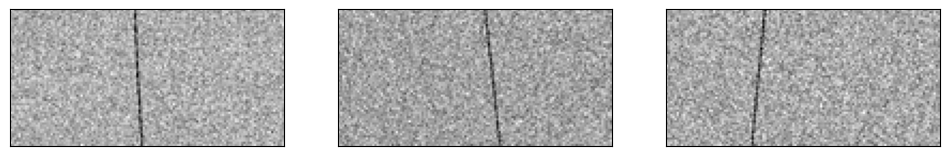

In [ ]:
# Take 3 training images randomely and draw them
plt.figure(0, figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = np.squeeze(x_train[np.random.randint(0, x_train.shape[0])]) # np.squeeze is used to delete non  useful dimension in (64,128,1) and transform the shape into (64,128) in order to fit into plt.imshow
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap="gray")

Creatingg One subPlot with 3 images in them, This is achived by looping the range(1, 4)

Then Using Matplotlib subplot helper function with 1 rows and 3 column

Then we create the image for our numpy array

np.squeez is used to remove the extra axis i.e the cahnnel inforamtion (800, 64, 128, 1) hence numpy is used to remove that additional axis

Then we set the xticks & yticks as a blank list.

Every output image corrospond to an class i.e squgel, narrow band or Noise.

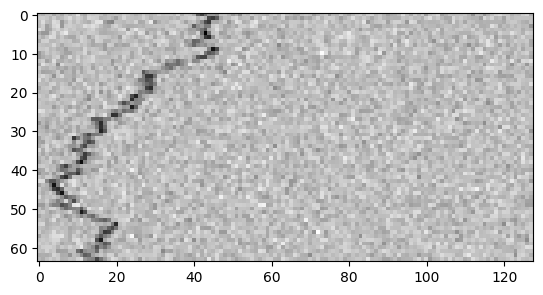

In [ ]:
img = np.squeeze(x_train[5]) # np.squeeze is used to delete non  useful dimension in (64,128,1) and transform the shape into (64,128) in order to fit into plt.imshow
plt.imshow(img,cmap="gray")


In [ ]:
print(x_train[5].shape)

(64, 128, 1)


Task 4: Create Training and Validation Data Generators

In [ ]:
# Data augmentation using ImageDataGenerator
# An input batch of images is presented to the ImageDataGenerator.
# The ImageDataGenerator transforms each image in the batch by a series of random translations, rotations, etc.
# The randomly transformed batch is then returned to the calling function.
#The ImageDataGenerator is not returning both the original data and the transformed data — the class only returns the randomly transformed data.
# Ref:https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_val)

Task 5: Creating the CNN Model

In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

Filter/Kernal = 5 x 5 <br>
Input Channel = 1 corresponding to the Gray scale Images<br>
We need 32 different feature Maps i,e 32 different<br>
Output of CNNs = 64 x 128 x 32

In [ ]:
# Initialising the CNN
model = Sequential()

# 1st Convolution
model.add(Conv2D(32,(5,5), padding='same', input_shape=(64, 128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Since we are using the larger Number or Neurons
# Hence we are setting a higher Dropout Regularization rate
# Adding the last dense Output layer ->> SOFTMAX 4 output classes


model.add(Dense(4, activation='softmax'))

Task 6: Learning Rate Scheduling and Compile the Model

In [ ]:
# Scheduling the Learning Rate
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps = 5,
    decay_rate = 0.96,
    staircase = True
)

# SettingUp the optimizer
opt = Adam(learning_rate = lr_schedule)

In [ ]:
# Compiling Our Model
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 32)       832       
                                                                 
 batch_normalization (BatchN  (None, 64, 128, 32)      128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 64, 64)        5

Task 7: Training the Model

In [ ]:
from livelossplot.inputs.tf_keras import PlotLossesCallback #use newer API

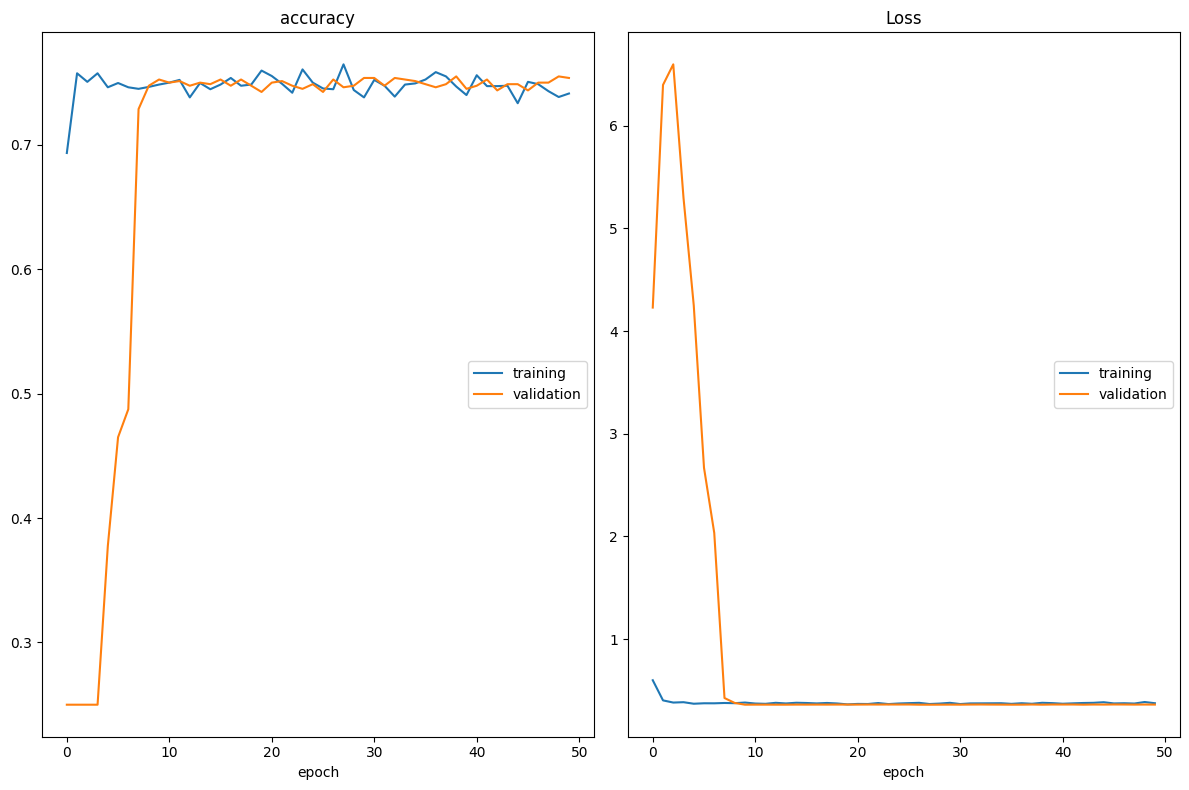

accuracy
	training         	 (min:    0.693, max:    0.765, cur:    0.741)
	validation       	 (min:    0.250, max:    0.755, cur:    0.754)
Loss
	training         	 (min:    0.364, max:    0.599, cur:    0.375)
	validation       	 (min:    0.361, max:    6.598, cur:    0.362)
100/100 [==============================] - 121s 1s/step - loss: 0.3752 - accuracy: 0.7412 - val_loss: 0.3620 - val_accuracy: 0.7538


In [ ]:
# ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
# Ref: https://keras.io/api/callbacks/model_checkpoint/
# https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6

# Creating the checkpoints i.e Saving the weights with maximum Validation accuracy
checkpoint = ModelCheckpoint("model_weights.h5",
                             monitor='val_loss',
                             save_weights_only=True,
                             mode='min',
                             verbose=0)

# Callbacks
callbacks = [PlotLossesCallback(), checkpoint]#, reduce_lr]

batch_size = 32

history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(x_train)//batch_size,
    validation_data = datagen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val)//batch_size,
    epochs=50,
    callbacks=callbacks
)

Task 8: Model Evaluation

In [ ]:
model.evaluate(x_val, y_val)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(x_val), 1)

print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

In [ ]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]

ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true, y_pred, normalize='true'), annot=True, ax = ax, cmap=plt.cm.Blues); # annot = True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);